# Final Project - Predict the House Prices in Ames, Iowa

## Section 1- Importing, Data Cleansing and Preparation

In [1]:
# Load the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import stats, norm
import os
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Check columns  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Checking for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total of Missing', 'Percent'])
missing_data.head(20)

,Total of Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
# Handling missing data - delete columns with many missing values (missing values percentage > 15%)
df_cln = df.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_cln2 = df_cln.dropna(axis=0, how='any')

In [9]:
# Check after reduction
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-

In [13]:
# Change year to house age
col_drop = ["YearBuilt", "YrSold", "YearRemodAdd", "GarageYrBlt"]

# Adding "house age", "years_remodeled" (years since last remodel), "age of garage" 
df_cln2["Age"] = df_cln2["YrSold"] - df_cln2["YearBuilt"]
df_cln2["YrRemod"] = df_cln2["YrSold"] - df_cln2["YearRemodAdd"]
df_cln2["GarageAge"] = df_cln2["YrSold"] - df_cln2["GarageYrBlt"]
df_cln3 = df_cln2.drop(df_cln2[col_drop],axis=1)


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [14]:
# Change MSSubClass to categorical
df_cln3['MSSubClass'] = df_cln3['MSSubClass'].astype('object')

## 2- Exploration Data Analysis 

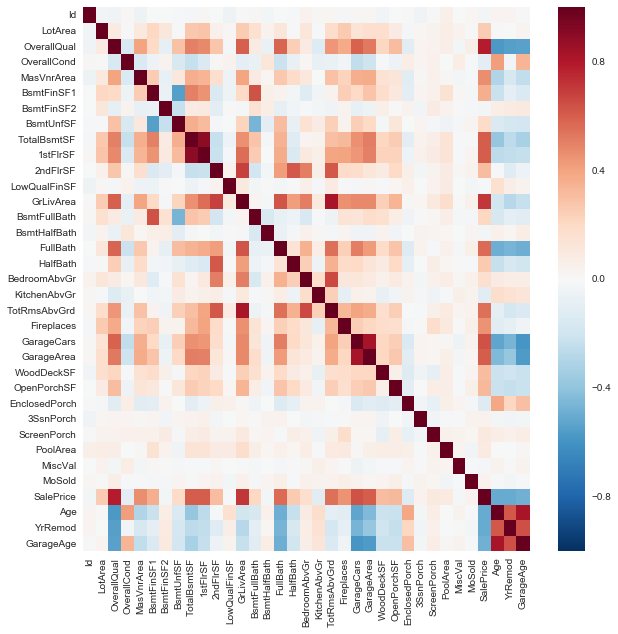

In [15]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
corr = df_cln3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
corr_df = df_cln3.corr


method

In [28]:
# Delete highly correlated (redundant) Features
col_drop2 = ["1stFlrSF","GarageCars"]#,"GarageAge"]
dta = df_cln3.drop(df_cln3[col_drop2],axis=1)

In [29]:
# Statistical Insight: Continuous Features
dta.describe()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,YrRemod,GarageAge
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,10706.294469,6.219731,5.596413,110.360239,464.234679,49.218236,582.494768,1095.947683,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,186761.782511,34.776532,22.136771,29.209268
std,421.779691,10336.621126,1.324472,1.078124,185.604816,458.792420,166.196584,439.950528,405.554435,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,78913.847668,29.603970,20.294171,24.813371
min,1.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,35311.000000,0.000000,-1.000000,0.000000
25%,366.250000,7744.000000,5.000000,5.000000,0.000000,0.000000,0.000000,248.000000,819.750000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,135000.000000,7.000000,4.000000,6.000000
50%,730.500000,9600.000000,6.000000,5.000000,0.000000,413.000000,0.000000,489.000000,1021.500000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,168500.000000,33.000000,14.000000,28.000000
75%,1098.750000,11760.750000,7.000000,6.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,220000.000000,52.000000,39.750000,46.750000
max,1460.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,755000.000000,129.000000,60.000000,107.000000


In [30]:
# Anomaly Detection and Deletion (one row in "YrRemod" with a negative value)
dta = dta.drop((dta.loc[dta["YrRemod"] < 0]).index)

In [58]:
# Categorical Features
dta.describe(include=["O"])

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,8,14,16,4,4,4,5,4,4,4,6,6,4,5,2,5,4,7,6,3,5,5,3,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,502,1065,1332,829,1206,1336,956,1264,209,1162,1324,1137,657,1037,1313,486,475,763,803,1182,619,594,1236,887,401,1175,1317,703,1276,1241,650,1253,852,580,1269,1286,1256,1158,1104


In [90]:
# Check variables for Skewness (-2 < Acceptable Range < 2)
print("Varibales Skewness:\n",dta.skew(),"\n \n")
print("Varibales Kurtosis:\n",dta.kurtosis())

Varibales Skewness:
 Id               -0.000171
MSSubClass        1.391605
LotArea          12.031839
OverallQual       0.306866
OverallCond       0.896399
MasVnrArea        2.592933
BsmtFinSF1        1.685464
BsmtFinSF2        4.144735
BsmtUnfSF         0.936770
TotalBsmtSF       2.190775
2ndFlrSF          0.766591
LowQualFinSF     10.562770
GrLivArea         1.332898
BsmtFullBath      0.461785
BsmtHalfBath      3.846194
FullBath         -0.021704
HalfBath          0.556096
BedroomAbvGr     -0.057758
KitchenAbvGr      5.941159
TotRmsAbvGrd      0.668723
Fireplaces        0.571917
GarageArea        0.808735
WoodDeckSF        1.483845
OpenPorchSF       2.213101
EnclosedPorch     3.203777
3SsnPorch        10.092682
ScreenPorch       3.915120
PoolArea         14.182462
MiscVal          24.623400
MoSold            0.206779
SalePrice         1.942905
Age               0.671335
YrRemod           0.561555
GarageAge         0.660672
dtype: float64 
 

Varibales Kurtosis:
 Id                -1.

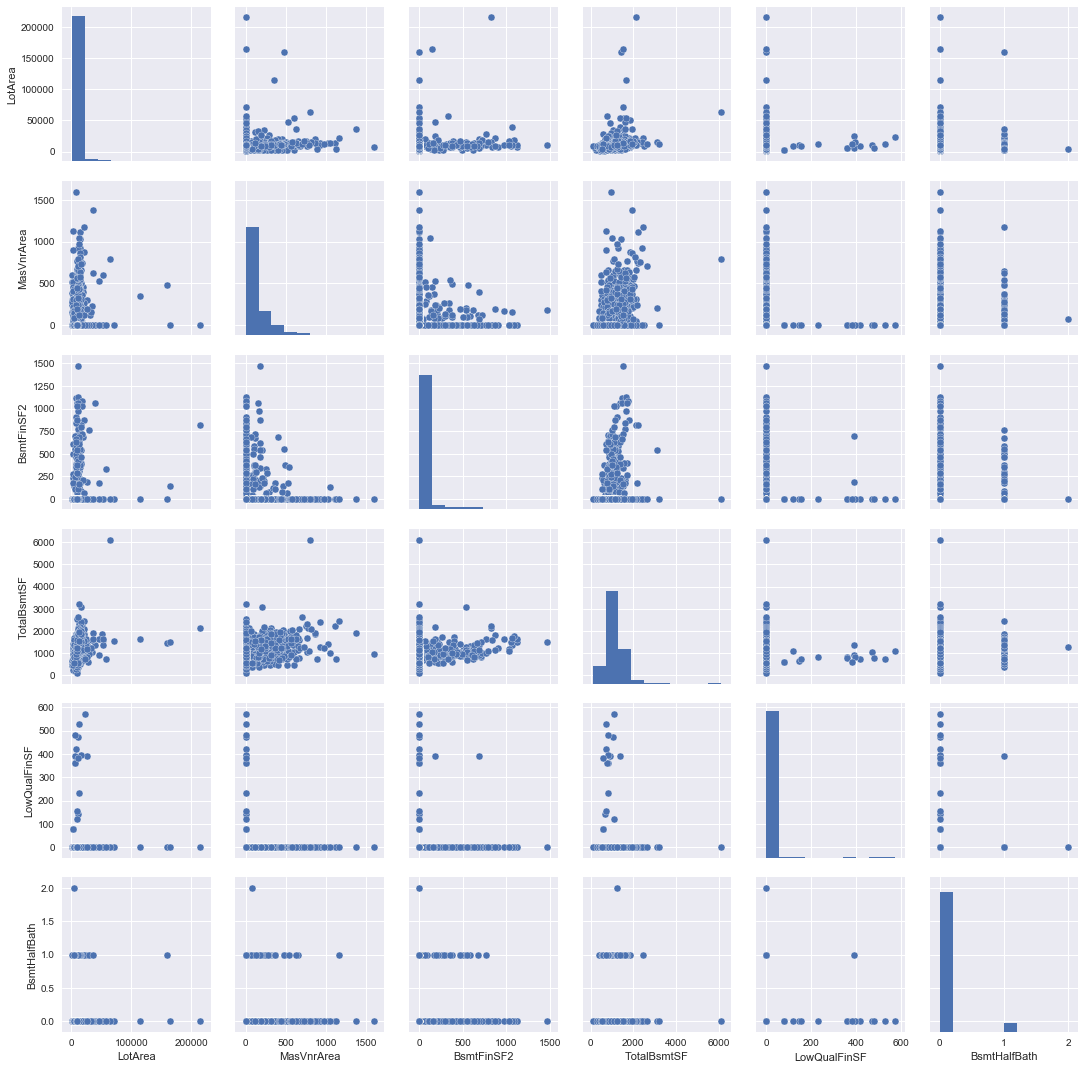

In [133]:
# List of columns with a Skewness value larger than 2 or less than -2
Skewed = ['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'OpenPorchSF','3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']

# Plot variables to check - part1
sns.pairplot(dta.loc[:,Skewed[0:6]], size = 2.5)
plt.show()

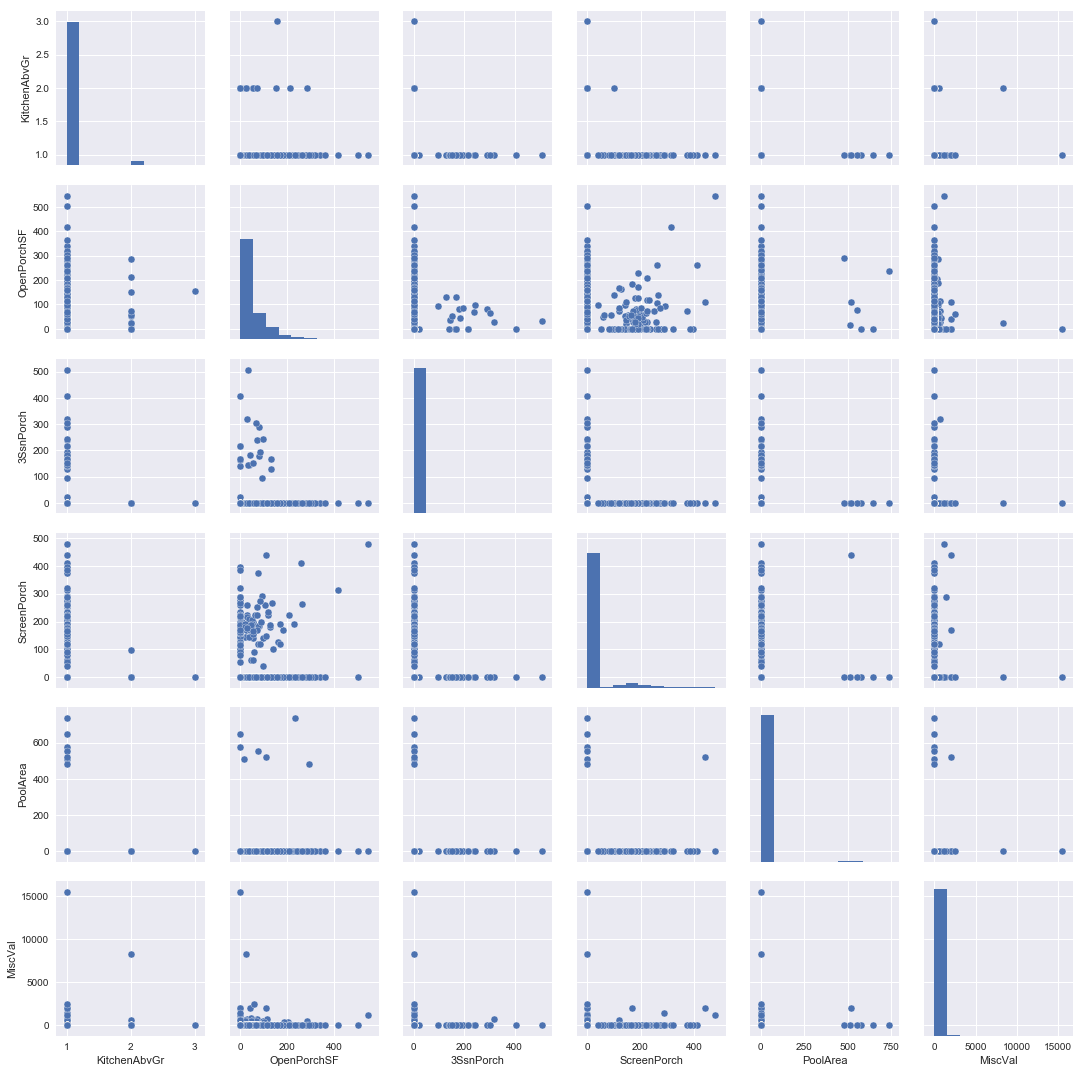

In [134]:
# Plot variables to check - part2
sns.pairplot(dta.loc[:,Skewed[6:]], size = 2.5)
plt.show()

#### Some of the categorical features are highly skewed (List of Skewed1 & Skewed2)

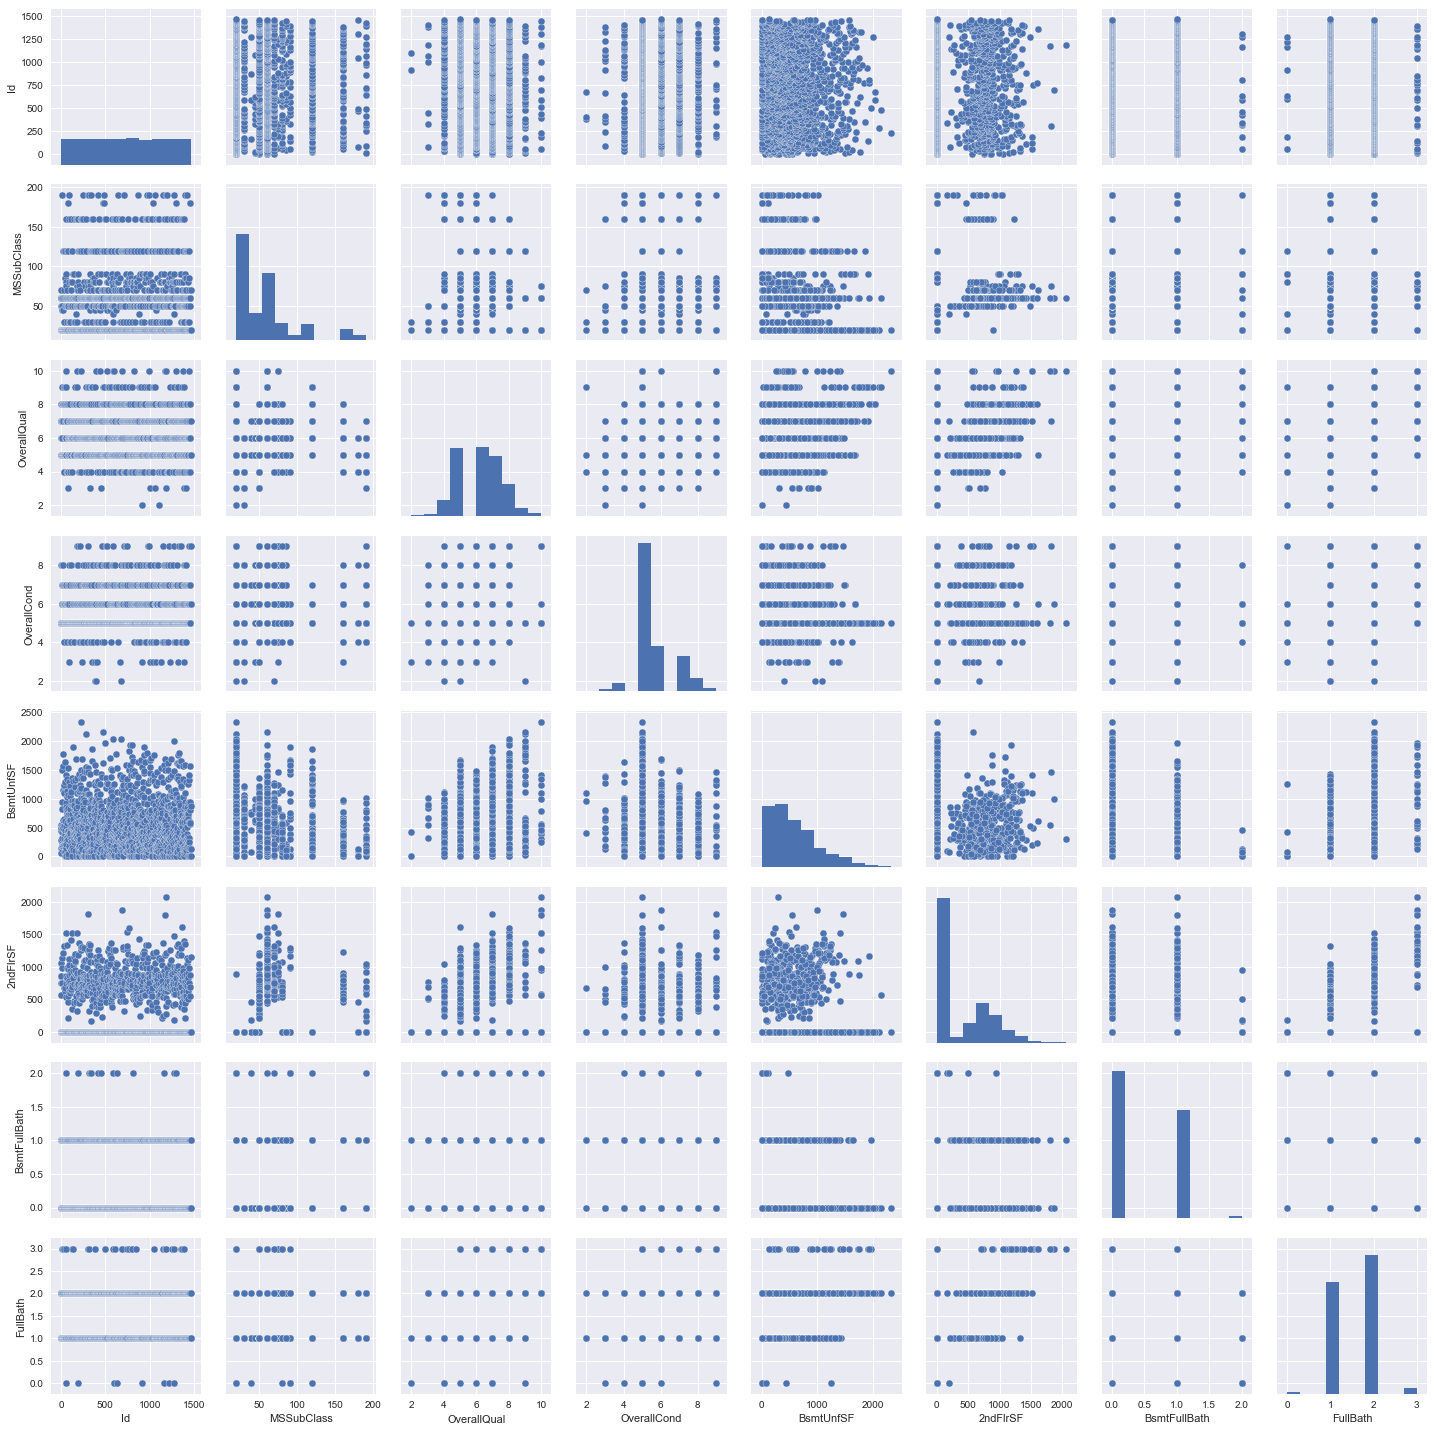

In [136]:
# List of columns with a kurtosis value larger than 2 or less than -2
MyList = dta.kurtosis()
Kdf = pd.DataFrame(MyList)
KurtVar = MySer[(MySer[0] >= -2) & (MySer[0] <= 2)]
KurtVariables = list(KurtVar.index.values)
KurtVariables

# Plot variables to check - part1
sns.pairplot(dta.loc[:,KurtVariables[0:8]], size = 2.5)
plt.show()

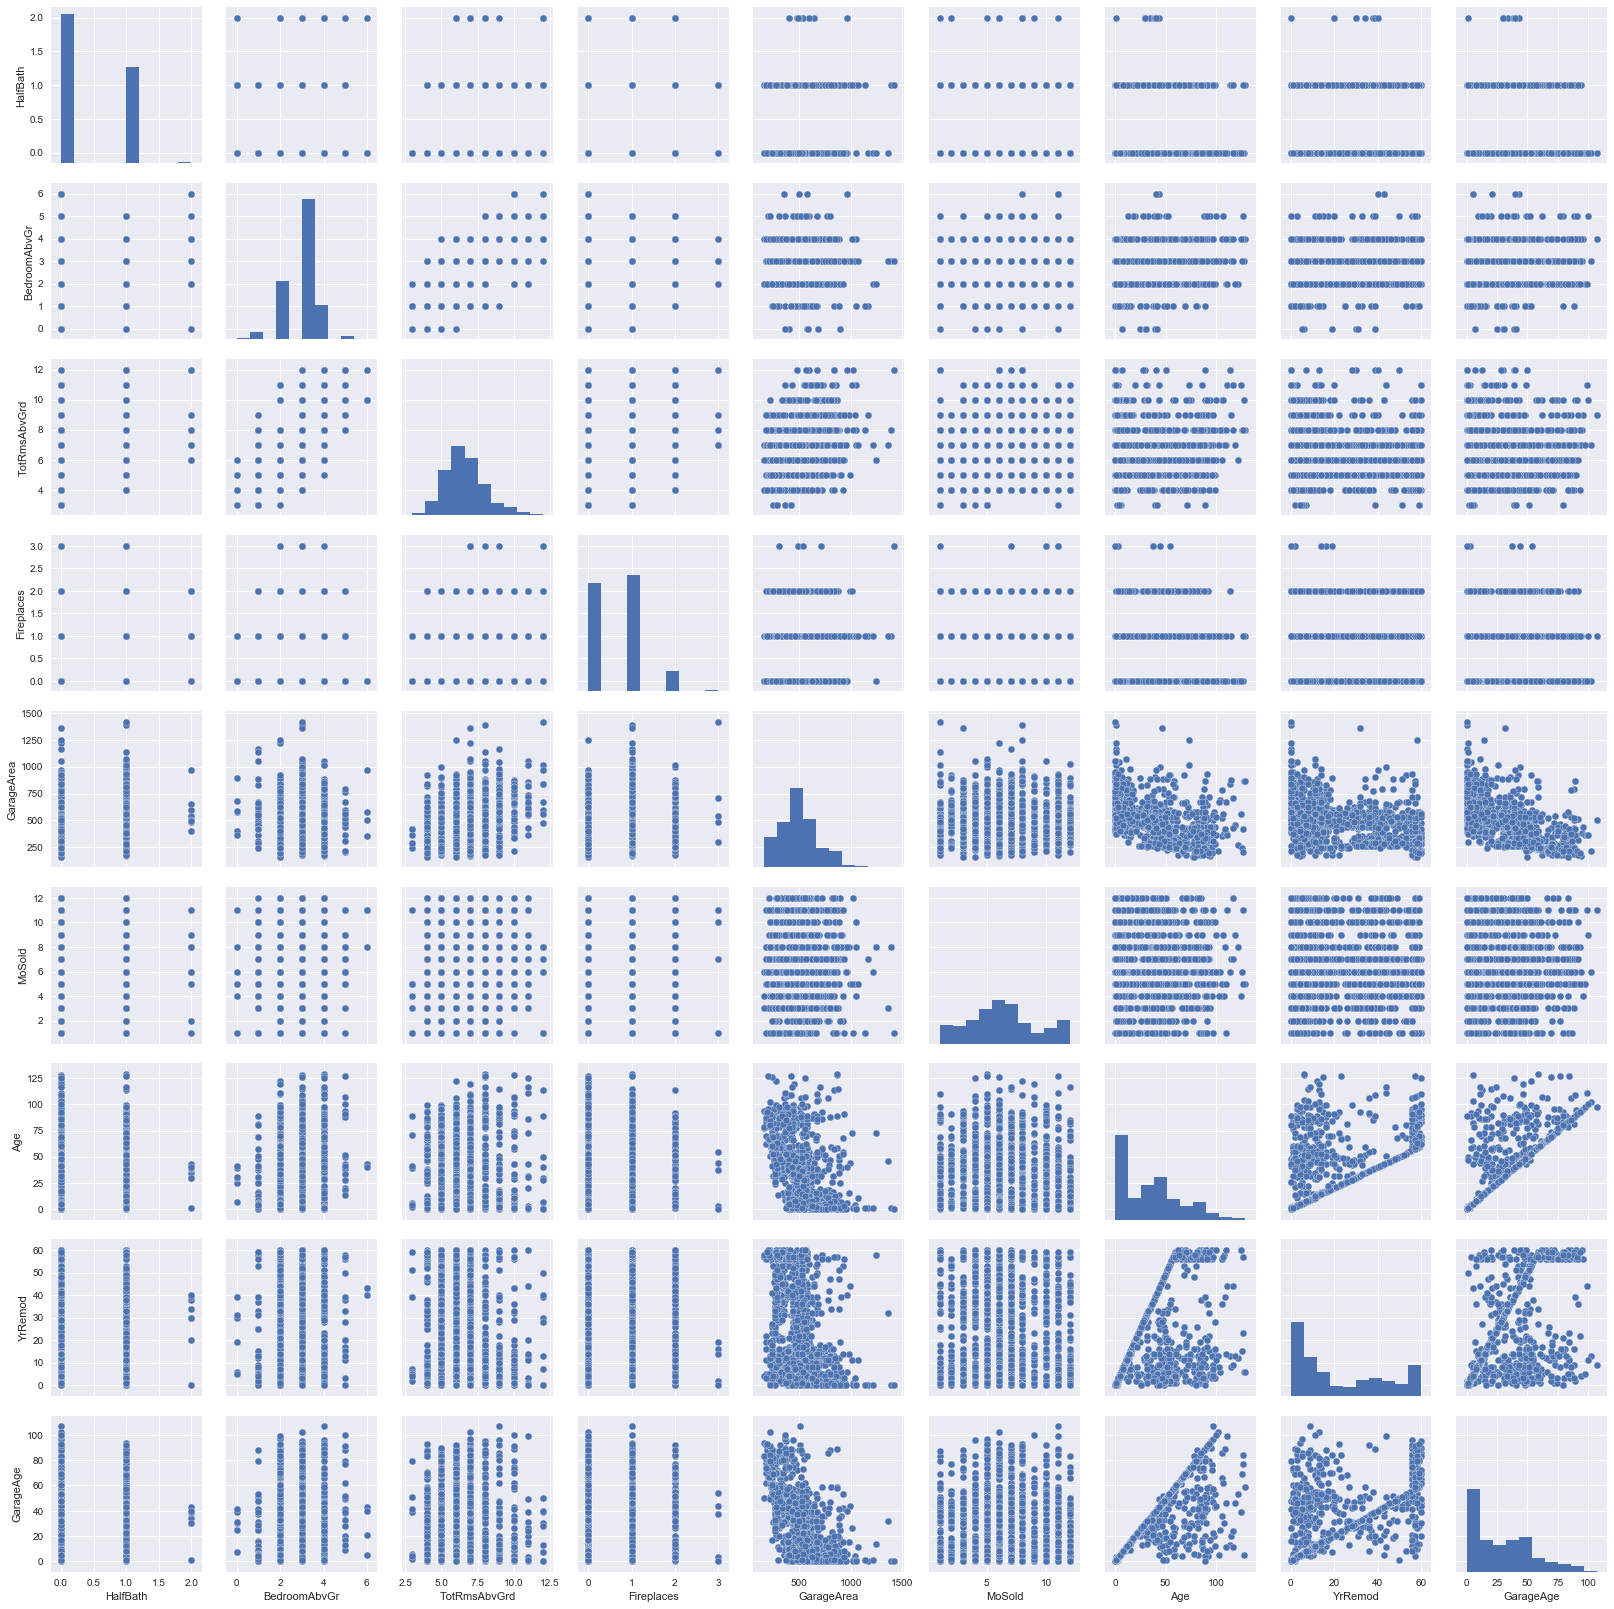

In [137]:
# Plot variables to check - part2
sns.pairplot(dta.loc[:,KurtVariables[8:]], size = 2.5)
plt.show()

#### Transformation required for Variables in Skewed U KurtVariables. Variables will be transformed after Feature Selection section below, as some of them will be left out so no need to transform them.

## Section 3- Feature Selection 

### Method 1: Mutual Information


In [138]:
from sklearn.feature_selection import mutual_info_regression

In [142]:
obj_df = dta.select_dtypes(include=['object']).copy()
int_df = dta.select_dtypes(exclude=['object']).copy()

obj_dict = {}
for i in obj_df.columns:
    obj_dict = obj_df[i].value_counts()

In [143]:
#Create the dummies
dum_df = pd.get_dummies(obj_df)

In [144]:
dta_dum = pd.concat([dum_df,int_df], axis=1)

In [146]:
#Apply the mutual information regressor to X and Y
X_mi = dta_dum.drop(['SalePrice'], axis=1)
y_mi = dta_dum['SalePrice']

In [147]:
# Obtain the mutual information score and devided by the max value in the list
mi = mutual_info_regression(X_mi, y_mi)
mi /= np.max(mi)

/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [148]:
mi_dir = dict(zip(X_mi.columns, mi))

In [149]:
# Sort the score from high to low.
for key, value in sorted(mi_dir.items(), key=lambda item: (item[1], item[0]), reverse=True):
    print ("%s: %s" % (key, value))

OverallQual: 1.0
GrLivArea: 0.899267025755
TotalBsmtSF: 0.654473005783
GarageArea: 0.646280940384
Age: 0.636129421003
FullBath: 0.491885799903
YrRemod: 0.482335365514
ExterQual_TA: 0.477680850458
GarageAge: 0.43217200309
KitchenQual_TA: 0.409635291991
TotRmsAbvGrd: 0.394737410283
BsmtQual_TA: 0.384423219218
2ndFlrSF: 0.381547993649
ExterQual_Gd: 0.368789558986
GarageFinish_Unf: 0.363900435199
KitchenQual_Gd: 0.316296724232
Foundation_PConc: 0.310309381445
LotArea: 0.298097503559
Fireplaces: 0.286667084453
BsmtQual_Gd: 0.275055578374
GarageType_Detchd: 0.272773630195
OpenPorchSF: 0.270770650775
HeatingQC_Ex: 0.251175634519
BsmtFinSF1: 0.250231082883
BsmtQual_Ex: 0.244849668633
BsmtUnfSF: 0.211508100507
OverallCond: 0.2092579122
BsmtFinType1_GLQ: 0.202476074805
GarageFinish_Fin: 0.200599189344
WoodDeckSF: 0.195244153227
Foundation_CBlock: 0.193422140021
MSSubClass_60: 0.190571351224
MasVnrArea: 0.17224029286
Exterior2nd_VinylSd: 0.167264142165
HeatingQC_TA: 0.16346981748
Exterior1st_Viny

Here is the criteria for Feature Selection: 
1- There is a large gap between some of the variables. For example, there is a gap between "GarageArea" (Mutual Info score = 0.622818293669) and "FullBath" (Mutual Info score = 0.483804508622).
2- To obtain a reasonable size of features, we need a sufficient number of features to build a good model to avoid over-fitting.
In this case, the first 14 features from the above analysis were selected to be in the model, namely: OverallQual, GrLivArea, TotalBsmtSF, GarageArea, Age, FullBath, YrRemod, ExterQual_TA, TotRmsAbvGrd, ExterQual_Gd, 2ndFlrSF, KitchenQual_TA BsmtQual_TA, GarageFinish_Unf

In [162]:
selected = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "BsmtQual_TA", 
            "GarageFinish_Unf"]
X = X_mi.loc[:,selected]

### Method 2: Stepwise Feature Selection using Logistic Regression -- RUNNING THE FOLLOWING CODE BLOCK TAKES APPROX. 20 MINUTES

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
logistic = LogisticRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
sfs1 = SFS(logistic, k_features=14, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0, n_jobs=-1)

X_miA = np.array(X_mi)
y_miA = np.array(y_mi)

sfs1 = sfs1.fit(X_miA, y_miA)
sfs1.subsets_


[2017-12-02 14:23:35] Features: 1/14 -- score: 0.020942408377
[2017-12-02 14:26:01] Features: 2/14 -- score: 0.0254300673149
STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

{1: {'avg_score': 0.020942408376963352,
  'cv_scores': array([ 0.02094241]),
  'feature_idx': (22,)},
 2: {'avg_score': 0.025430067314884067,
  'cv_scores': array([ 0.02543007]),
  'feature_idx': (253, 22)}}

In [154]:
print("Features Indices :", sfs1.k_feature_idx_)
dta_dum.columns[[sfs1.k_feature_idx_]]

Features Indices : (253, 22)


Index(['2ndFlrSF', 'LotShape_IR1'], dtype='object')

## Section 4: EDA continued, Normalization and Regularization

In [156]:
# Transformed Response Variable
# Applying log transformation
y = np.log(y_mi)

/Users/askar/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


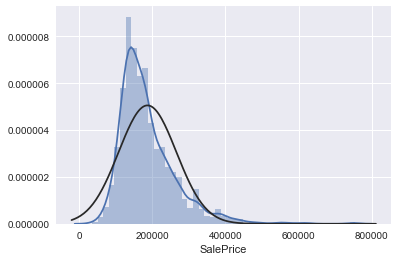

In [28]:
# Checking Normality Before Transformation
sns.distplot(y_mi, fit=norm);
fig = plt.figure()

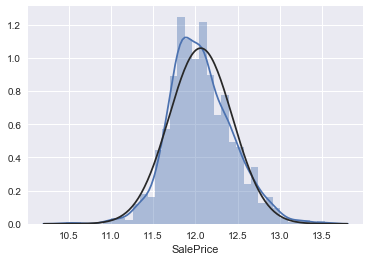

In [159]:
# Checking Normality After Transformation
sns.distplot(y, fit=norm);
fig = plt.figure()

#### Features Normalization

In [160]:
from sklearn import preprocessing

In [163]:
# Normalizing Features
cols_scaled = ["OverallQual","GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "YrRemod", 
               "TotRmsAbvGrd", "2ndFlrSF", "FullBath"]
X_scaled = X.loc[:,cols_scaled]
X_standardized = (X_scaled - X_scaled.mean())/X_scaled.std()
X.update(X_standardized)
X = pd.DataFrame(preprocessing.normalize(X, norm='l2'),columns = selected)

### Regularization: LASSO & Elastic Net

In [166]:
from sklearn import linear_model, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [167]:
# Lasso

def LASTest(X_trn, X_ts, y_trn, y_ts):
    #Fit the LASSO regression
    model_fit = linear_model.LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
                           max_iter=5000,
                           cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_lasso = model_fit.predict(X_trn)
    test_pred_lasso = model_fit.predict(X_ts)
    r2_score_lasso = r2_score(y_ts, test_pred_lasso)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_lasso) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_lasso) ** 2))    
    print("r^2 on data : %f" % r2_score_lasso)

    
# Elastic Net

def ENSTest(X_trn, X_ts, y_trn, y_ts):
    model_fit = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                                    l1_ratio=[.01, .1, .5, .9, .99], 
                                    max_iter=5000,
                                   cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_ENS = model_fit.predict(X_trn)
    test_pred_ENS = model_fit.predict(X_ts)
    r2_score_ENS = r2_score(y_ts, test_pred_ENS)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_ENS) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_ENS) ** 2))    
    print("r^2 on data : %f" % r2_score_ENS)


In [168]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [169]:
LASTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35568903030459242), ('GrLivArea', 0.55207571393699129), ('TotalBsmtSF', 0.31820392375313755), ('GarageArea', 0.16193341434780378), ('Age', -0.21171160113556312), ('FullBath', -0.11155015626935808), ('YrRemod', -0.18528253174615625), ('ExterQual_TA', -0.13044136811204657), ('TotRmsAbvGrd', 0.019370358924623618), ('ExterQual_Gd', -0.40446275892963751), ('2ndFlrSF', 0.047963208776826159), ('KitchenQual_TA', -0.066312632498743043), ('BsmtQual_TA', 0.0085704171943807219), ('GarageFinish_Unf', -0.20193397248880834)]
Fit a model X_train, and calculate MSE with Y_train: 0.031020347936680553
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02851401570614021
r^2 on data : 0.787756


The coefficient of 'ExterQual_TA', 'BsmtQual_TA' are 0, which means they can be be deleted.

In [170]:
ENSTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35819143082503457), ('GrLivArea', 0.54457861940873631), ('TotalBsmtSF', 0.31726892991072442), ('GarageArea', 0.16694894189646683), ('Age', -0.19752945797153618), ('FullBath', -0.10716866370964792), ('YrRemod', -0.18324419341995474), ('ExterQual_TA', -0.085052983025907913), ('TotRmsAbvGrd', 0.024410251377010535), ('ExterQual_Gd', -0.34531701980067742), ('2ndFlrSF', 0.046253976772515637), ('KitchenQual_TA', -0.060546989795014647), ('BsmtQual_TA', 0.0), ('GarageFinish_Unf', -0.19334005130121015)]
Fit a model X_train, and calculate MSE with Y_train: 0.031077893495633137
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02835500254016539
r^2 on data : 0.788940


From the result of the regularization, we delete "BsmtQual_TA".

In [171]:
selected2 =["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "GarageFinish_Unf"]
X = X.loc[:,selected2]

## Section 5: Clustering and Outliers Detection

### KMeans:

In [177]:
from sklearn.cluster import KMeans

In [178]:
k_means = KMeans(n_clusters = 4)
k_means.fit(dta_dum)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [180]:
labels = k_means.labels_
labels

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

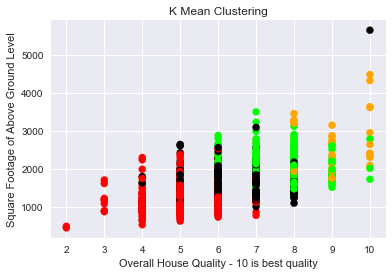

In [181]:
# Use for Overall House Quality, and Above Ground Area (most important two factos given by both Mutual information and random forest)
colormap = np.array(['red', 'lime', 'black', 'orange'])
plt.scatter(dta_dum.OverallQual, dta_dum.GrLivArea, c=colormap[labels], s=50)
plt.title('K Mean Clustering')
plt.xlabel('Overall House Quality - 10 is best quality')
plt.ylabel('Square Footage of Above Ground Level')

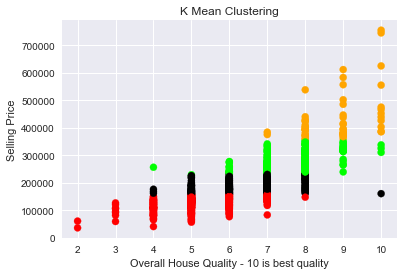

In [182]:
plt.scatter(dta_dum.OverallQual, dta_dum.SalePrice, c=colormap[labels], s=50)
plt.title('K Mean Clustering')
plt.xlabel('Overall House Quality - 10 is best quality')
plt.ylabel('Selling Price')

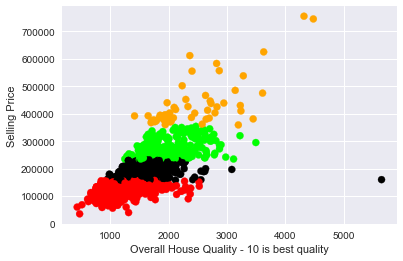

In [183]:
plt.scatter(dta_dum.GrLivArea, dta_dum.SalePrice, c=colormap[labels], s=50)
plt.xlabel('Overall House Quality - 10 is best quality')
plt.ylabel('Selling Price')

There is one data point with large living area and high rating, but was sold at low price.

In [184]:
dta[(dta["SalePrice"] > 5000) & (dta["OverallQual"] == 10)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,YrRemod,GarageAge
58,59,60,RL,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,BuiltIn,Fin,641,TA,TA,Y,192,0,37,0,0,0,0,10,New,Partial,438780,0,0,0.0
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,Detchd,Unf,840,Ex,TA,Y,0,260,0,0,410,0,0,6,WD,Normal,475000,114,13,13.0
224,225,20,RL,13472,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Attchd,Fin,968,TA,TA,Y,248,105,0,0,0,0,0,6,WD,Normal,386250,6,6,6.0
389,390,60,RL,12474,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,Y,SBrkr,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,BuiltIn,Fin,846,TA,TA,Y,196,134,0,0,0,0,0,8,New,Partial,426000,1,0,0.0
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Attchd,Fin,672,TA,TA,Y,0,72,0,0,170,0,0,4,WD,Normal,555000,1,1,1.0
515,516,20,RL,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,BrkFace,305.0,Ex,TA,CBlock,Ex,TA,No,GLQ,1436,Unf,0,570,2006,GasA,Ex,Y,SBrkr,0,0,2020,1,0,2,1,3,1,Ex,9,Typ,1,Attchd,Fin,900,TA,TA,Y,156,54,0,0,0,0,0,9,New,Partial,402861,0,0,0.0
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Detchd,Unf,880,Gd,TA,Y,105,502,0,0,0,0,0,7,WD,Normal,325000,115,8,20.0
591,592,60,RL,13478,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,BuiltIn,RFn,842,TA,TA,Y,382,274,0,0,0,0,0,6,ConLI,Normal,451950,1,1,1.0
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,Fin,832,TA,TA,Y,382,50,0,0,0,0,0,1,WD,Normal,755000,13,12,13.0
825,826,20,RL,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Attchd,Fin,1220,TA,TA,Y,188,45,0,0,0,0,0,6,New,Partial,385000,1,0,1.0


It is the house Id 1299, a new house and large living area, but it was sold $160000. 

## Section 6: Prediction Models
### Linear Regression

In [185]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [186]:
regr = linear_model.LinearRegression()

In [187]:
# Train the model using the training sets
regr_model = regr.fit(x_train, y_train)

In [188]:
list(zip(regr_model.coef_, selected2))

[(0.35315309555985885, 'OverallQual'),
 (0.54881999154978445, 'GrLivArea'),
 (0.32178656743548251, 'TotalBsmtSF'),
 (0.15986014420624756, 'GarageArea'),
 (-0.21528290704694683, 'Age'),
 (-0.11493011339767883, 'FullBath'),
 (-0.18587630823856735, 'YrRemod'),
 (-0.14978842302440737, 'ExterQual_TA'),
 (0.01997889530795123, 'TotRmsAbvGrd'),
 (-0.43059362337574858, 'ExterQual_Gd'),
 (0.051971384283237165, '2ndFlrSF'),
 (-0.069352603260781243, 'KitchenQual_TA'),
 (-0.20707998675575914, 'GarageFinish_Unf')]

In [189]:
# Mean Squared Error for training and test data
test_pred = regr_model.predict(x_test)
r2_test_reg = r2_score(y_test, test_pred)

print("r^2 on test : %f" % r2_test_reg)
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_pred) ** 2))

r^2 on test : 0.786837
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028637510770394392


In [190]:
scores = cross_validation.cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=5)
print("The cv score is", scores)
print("The average of cv score is", scores.mean())

The cv score is [-0.02947165 -0.02693236 -0.03315312 -0.03506251 -0.03068694]
The average of cv score is -0.0310613154373


#### Model diagnosis

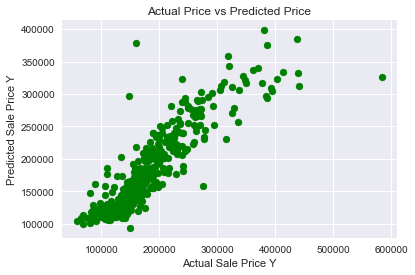

In [191]:
plt.scatter(np.exp(y_test), np.exp(test_pred), c = "g")
plt.xlabel("Actual Sale Price Y")
plt.ylabel("Predicted Sale Price Y")
plt.title("Actual Price vs Predicted Price")

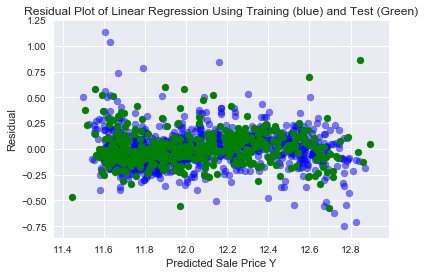

In [195]:
train_pred = regr_model.predict(x_train)
r2_train_reg = r2_score(y_train, train_pred)
plt.scatter(train_pred, train_pred - y_train, c = "b", alpha = 0.5)
plt.scatter(test_pred, test_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression Using Training (blue) and Test (Green)")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

### Approach 1: Stochastic Gradient Descent

In [196]:
from sklearn.linear_model import SGDRegressor

In [197]:
X_sgd = X_mi.loc[:,selected2]

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_sgd)
X_sgd = pd.DataFrame(preprocessing.normalize(scaler.transform(X_sgd), norm='l2'),columns = selected2)

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X_sgd, y, test_size=0.3, random_state=123)

In [200]:
sgd_reg = SGDRegressor()

In [201]:
sgd_reg_model = sgd_reg.fit(x_train, y_train)

/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [202]:
list(zip(sgd_reg_model.coef_, selected2))

[(0.21260539296466008, 'OverallQual'),
 (0.18712281593845262, 'GrLivArea'),
 (0.15188934081045982, 'TotalBsmtSF'),
 (0.04758219864965077, 'GarageArea'),
 (-0.17758833965810072, 'Age'),
 (0.040467310642167374, 'FullBath'),
 (-0.10943266361968212, 'YrRemod'),
 (0.013184444549803118, 'ExterQual_TA'),
 (0.1032009697867642, 'TotRmsAbvGrd'),
 (0.021982018739964599, 'ExterQual_Gd'),
 (0.063723373322614643, '2ndFlrSF'),
 (-0.14786343836565718, 'KitchenQual_TA'),
 (-0.29668351123702852, 'GarageFinish_Unf')]

In [203]:
# Mean Square Error for Training and Test Data
test_sgd_pred = sgd_reg_model.predict(x_test)
r2_test_reg = r2_score(y_test, test_sgd_pred)
print("r^2 on test : %f" % r2_test_reg)
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_sgd_pred) ** 2))

r^2 on test : 0.694216
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.04108075198344788


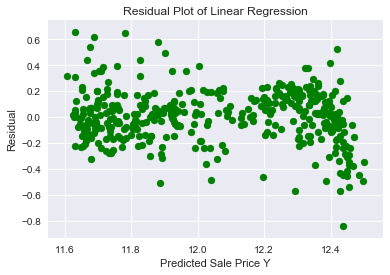

In [204]:
plt.scatter(test_sgd_pred, test_sgd_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

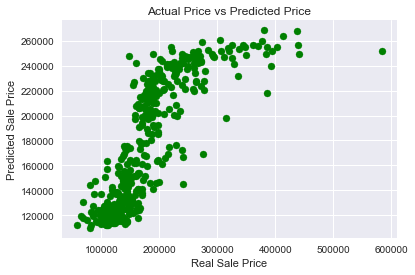

In [205]:
plt.scatter(np.exp(y_test), np.exp(test_sgd_pred), c = "g")
plt.ylabel("Predicted Sale Price")
plt.xlabel("Real Sale Price")
plt.title("Actual Price vs Predicted Price")

#### Delete the outlier resulting from the unsupervised clustering part and rerun Linear Regression...


In [206]:
X_new = X.drop(X.index[1298])
y_new = y.drop(y.index[1298])

In [207]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

In [208]:
LASTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35527493720302772), ('GrLivArea', 0.55131820825165312), ('TotalBsmtSF', 0.3179695797023015), ('GarageArea', 0.16059135582533973), ('Age', -0.21010656200341687), ('FullBath', -0.11210748743236981), ('YrRemod', -0.18520007415641473), ('ExterQual_TA', -0.12809487505296965), ('TotRmsAbvGrd', 0.021150869192598579), ('ExterQual_Gd', -0.40293306898851189), ('2ndFlrSF', 0.046542641734663596), ('KitchenQual_TA', -0.065753847906030019), ('GarageFinish_Unf', -0.20192070318647728)]
Fit a model X_train, and calculate MSE with Y_train: 0.031010420779816496
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02860069631246346
r^2 on data : 0.788570


In [209]:
ENSTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35525674549544711), ('GrLivArea', 0.55124166702503408), ('TotalBsmtSF', 0.31802217645132086), ('GarageArea', 0.16058078831799505), ('Age', -0.21013956956519292), ('FullBath', -0.11212902500617739), ('YrRemod', -0.18520651231814367), ('ExterQual_TA', -0.128245899770355), ('TotRmsAbvGrd', 0.021168464657922711), ('ExterQual_Gd', -0.40312334221600182), ('2ndFlrSF', 0.046609321082404877), ('KitchenQual_TA', -0.065791445888105773), ('GarageFinish_Unf', -0.20196466613837796)]
Fit a model X_train, and calculate MSE with Y_train: 0.03101031757499948
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028601696974623347
r^2 on data : 0.788562


Removing that record increased the accuracy of the model, albiet not by much

## Approach 2: Random Forest for Regression

In [210]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [211]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=3)

features = dta_dum.columns.drop(['SalePrice'])
X_TrainTree = np.array(dta_dum[features])
target = dta_dum.SalePrice
y_TrainTree = np.array(target)

model.fit(X_TrainTree, y_TrainTree)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=3, verbose=0, warm_start=False)

### Get and plot feature importance for all 149 features

In [219]:
fImportance = pd.Series(model.feature_importances_, index=features)
fImportance = fImportance.sort_values(ascending=False)

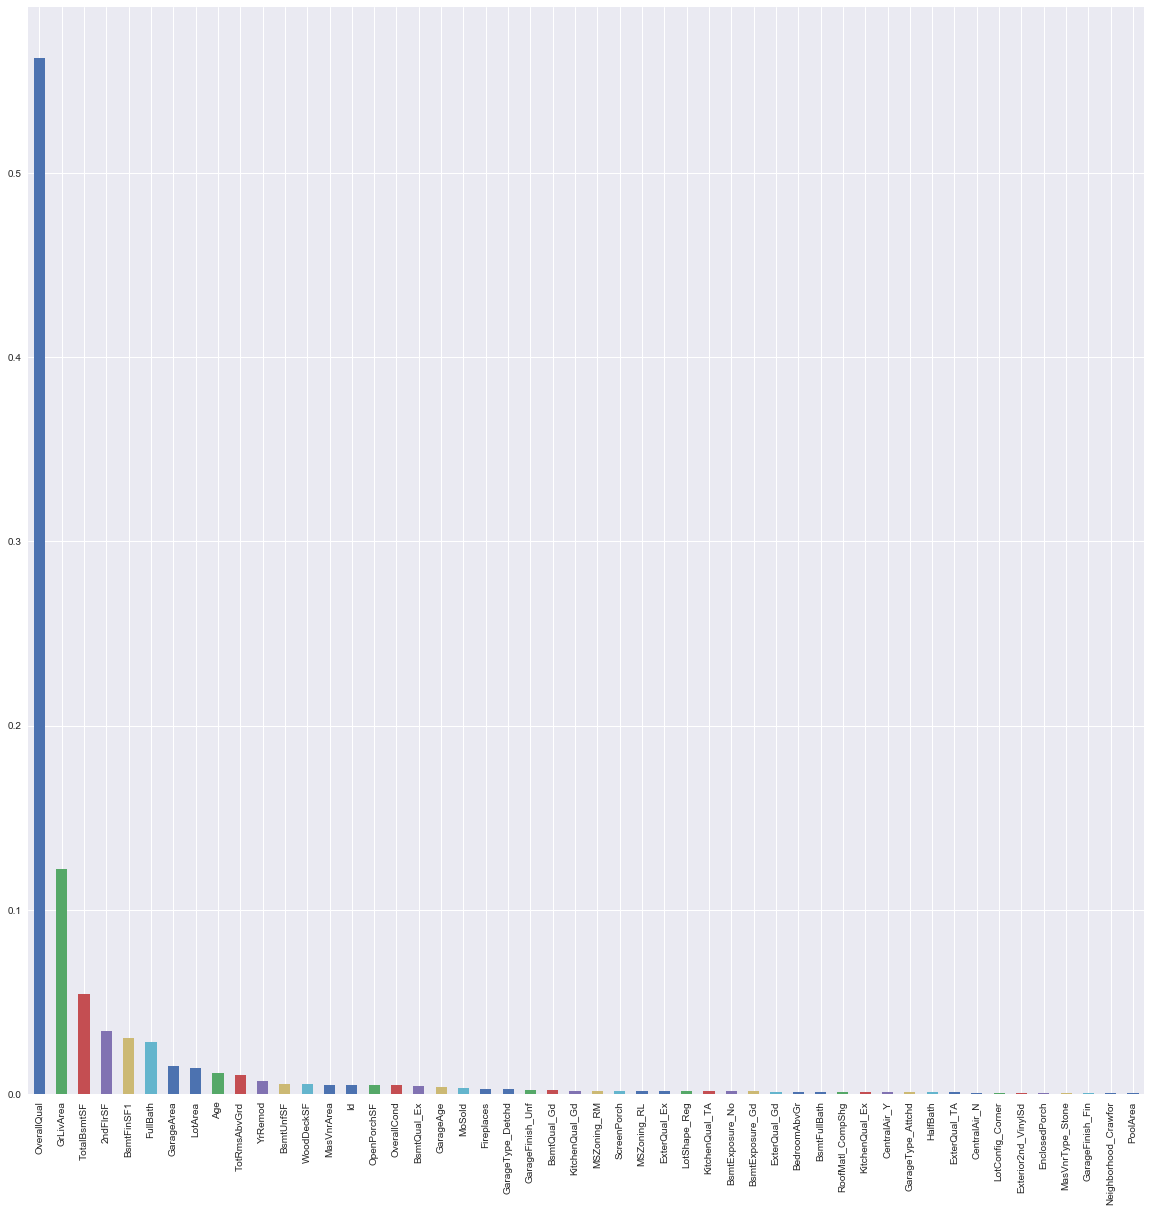

In [220]:
fImportance.head(50).plot(kind="bar", figsize=(20,20))

In [221]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X_TrainTree, y_TrainTree,cv=10)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.860 (+/- 0.13)


In [226]:
y_oob = model.oob_prediction_
print(y_oob)

array([ 203555.53079179,  166863.3       ,  219205.80366492, ...,
        251752.55737705,  139007.55091384,  149580.62089552])

In [225]:
print("R^2 value based on the Out-of-Bag Score:", model.oob_score_)

R^2 value based on the Out-of-Bag Score: 0.857569300989
